## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
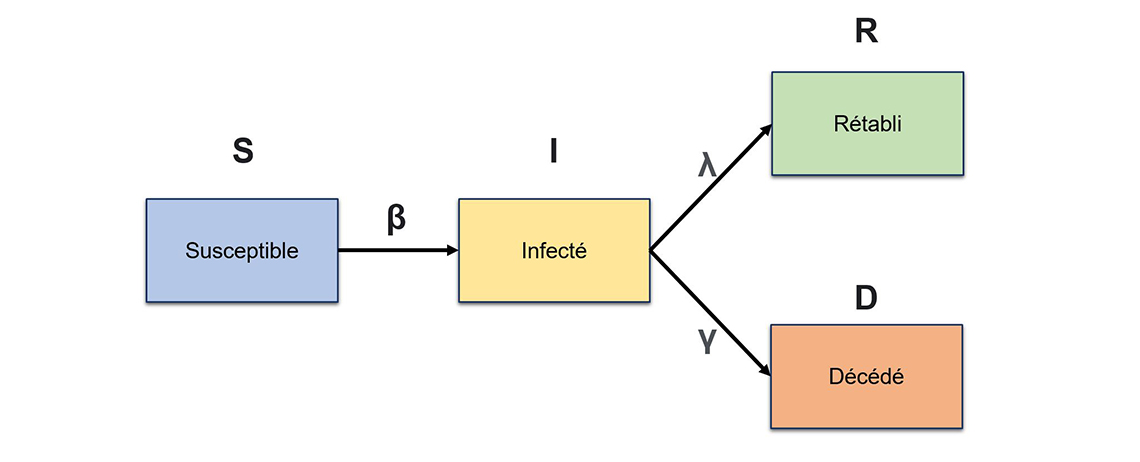


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [1]:
#0 et 1
def sird_euler(S, I, R, D, beta, gamma, mu, step, nb_steps):
    time = [0]
    for i in range(1, nb_steps):
        # Mise à jour du temps
        current_time = time[-1] + step
        time.append(current_time)
        
        # Calcul des variations
        var_S = -beta * S[-1] * I[-1] * step
        var_I = (beta * S[-1] * I[-1] - (gamma + mu) * I[-1]) * step
        var_R = gamma * I[-1] * step
        var_D = mu * I[-1] * step
        
        # Mise à jour des populations
        S.append(S[-1] + var_S)
        I.append(I[-1] + var_I)
        R.append(R[-1] + var_R)
        D.append(D[-1] + var_D)
    
    return S, I, R, D, time


### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [3]:
S = [0.99]
I = [0.01]
R = [0]
D = [0]
beta, gamma, mu = 0.5, 0.15, 0.015
step = 0.01
nb_steps = int(90 / step)  # nombre total de pas pour couvrir 89 jours

# Appel à la fonction avec les paramètres
S_results, I_results, R_results, D_results, time = sird_euler(S, I, R, D, beta, gamma, mu, step, nb_steps)


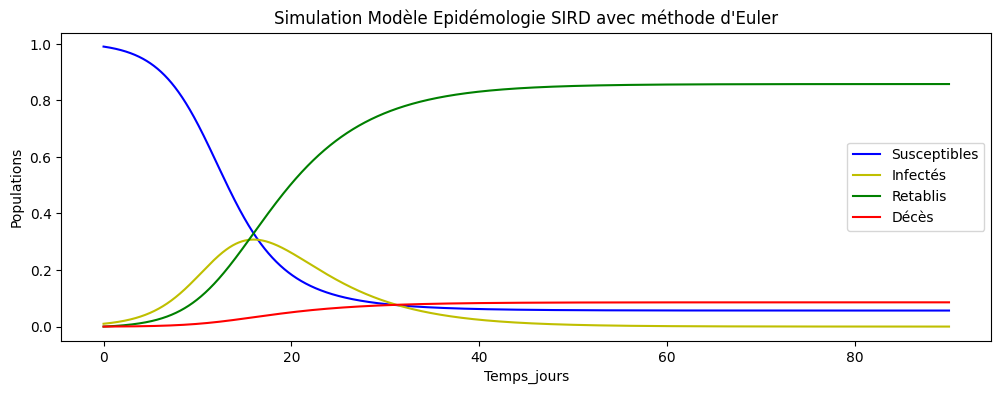

In [12]:
#2
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(time, S_results, "b-", label="Susceptibles")
plt.plot(time, I_results, "y-", label="Infectés")
plt.plot(time, R_results, "g-", label="Retablis")
plt.plot(time, D_results, "r-", label="Décès")
plt.title("Simulation Modèle Epidémologie SIRD avec méthode d'Euler")
plt.xlabel("Temps_jours")
plt.ylabel("Populations")
plt.legend()
plt.show()


## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [18]:
#1
import pandas as pd

df = pd.read_csv("sird_dataset.csv")
df.head(5)

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,-0.002455,-0.004622
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,-0.001515
3,3,0.988132,0.008969,-0.006308,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [20]:
#2 MSE
import numpy as np
import math

def sird_mse(prediction, real_values):
    nm_jours = len(real_values)
    
    prediction_times = np.linspace(0, nm_jours - 1, num=len(prediction))
    real_times = np.arange(nm_jours)

    interpolated_prediction = np.interp(real_times, prediction_times, prediction)
    
    mse = np.mean((interpolated_prediction - real_values) ** 2)
    
    return mse

  
S_mse = sird_mse(S, df['Susceptibles'].values)
I_mse = sird_mse(I, df['Infectés'].values)
R_mse = sird_mse(R, df['Rétablis'].values)
D_mse = sird_mse(D, df["Décès"].values)



print(S_mse+I_mse+R_mse+D_mse)


0.08983162343654051


In [29]:
from itertools import product

best_betas = np.linspace(0.25, 0.5, 10)
best_gammas = np.linspace(0.08, 0.15, 10)
best_mus = np.linspace(0.005, 0.015, 10)

best_mse = float('inf')
best_params = None 

for bets, gamma, mu in product(best_betas, best_gammas, best_mus):
    
    # Simulation avec les paramètres actuels
    S_results, I_results, R_results, D_results, time = sird_euler(S, I, R, D, bets, gamma, mu, step, nb_steps)
    
    # Calculer l'erreur (MSE)
    mse = sird_mse([S_results, I_results, R_results, D_results], [S_true, I_true, R_true, D_true])


ValueError: object too deep for desired array

In [ ]:
#4

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

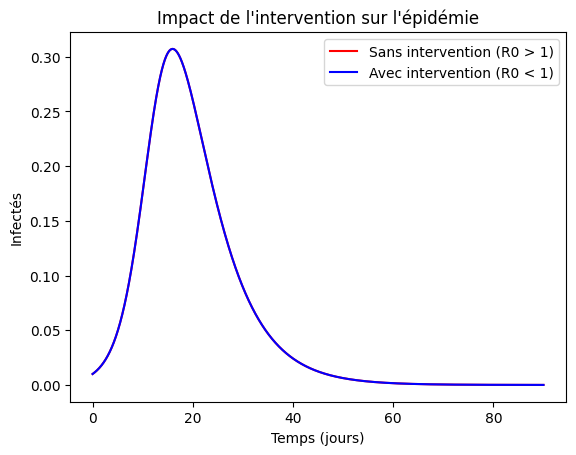

R0 sans intervention : 3.0303030303030307
R0 avec intervention : 1.2121212121212124


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation des variables
S, I, R, D = [0.99], [0.01], [0], [0]
beta, gamma, mu = 0.5, 0.15, 0.015
step, nb_steps = 0.01, int(90 / 0.01)

# Fonction SIRD Euler
def sird_euler(S, I, R, D, beta, gamma, mu, step, nb_steps):
    time = [0]
    for _ in range(1, nb_steps):
        S.append(S[-1] - step * beta * S[-1] * I[-1])
        I.append(I[-1] + step * (beta * S[-1] * I[-1] - (gamma + mu) * I[-1]))
        R.append(R[-1] + step * gamma * I[-1])
        D.append(D[-1] + step * mu * I[-1])
        time.append(time[-1] + step)
    return S, I, R, D, time

# Calcul de R0
def calc_R0(beta, gamma, mu):
    return beta / (gamma + mu)

# Scénario sans intervention
R0_no_intervention = calc_R0(beta, gamma, mu)
S_results_no_intervention, I_results_no_intervention, _, _, time_no_intervention = sird_euler(S, I, R, D, beta, gamma, mu, step, nb_steps)

# Scénario avec intervention (réduction de beta)
beta_intervention = 0.2  # réduction de beta pour simuler une intervention
R0_with_intervention = calc_R0(beta_intervention, gamma, mu)
S_results_with_intervention, I_results_with_intervention, _, _, time_with_intervention = sird_euler(S, I, R, D, beta_intervention, gamma, mu, step, nb_steps)

# Redimensionner les résultats pour que les vecteurs de temps aient la même longueur
min_len = min(len(time_no_intervention), len(I_results_no_intervention), len(time_with_intervention), len(I_results_with_intervention))

time_no_intervention = time_no_intervention[:min_len]
I_results_no_intervention = I_results_no_intervention[:min_len]
time_with_intervention = time_with_intervention[:min_len]
I_results_with_intervention = I_results_with_intervention[:min_len]

# Affichage des résultats
plt.plot(time_no_intervention, I_results_no_intervention, 'r-', label="Sans intervention (R0 > 1)")
plt.plot(time_with_intervention, I_results_with_intervention, 'b-', label="Avec intervention (R0 < 1)")
plt.title("Impact de l'intervention sur l'épidémie")
plt.xlabel("Temps (jours)")
plt.ylabel("Infectés")
plt.legend()
plt.show()

# Affichage des R0
print(f"R0 sans intervention : {R0_no_intervention}")
print(f"R0 avec intervention : {R0_with_intervention}")


3.